| Übungszettel 2 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 29.04.21 23.15 Uhr |
| Studierende | Daniel Schiller, Thomas Blankenburg, Dennis Jakob |


---

### Aufgabe 1: Skalarprodukt

Definieren Sie eine Funktion `l2prod(coeff_p, coeff_q)`, die das $L^2([-1,1])$-Skalarprodukt
$$\int_{-1}^1 p(x) q(x) \,dx$$
berechnet, wobei die Polynome $p$ und $q$ als Potenzreihe (aufsteigend) durch die Koeffizienten `coeff_p` und `coeff_q` bestimmt sind. Das heißt, bestehe der Vektor `coeff_p` aus den Skalaren $\alpha_0,\ldots,\alpha_n$, so ist das Polynom $p$ bestimmt durch
$$ p(x)=\sum_{k=0}^n \alpha_k x^k .$$

**Verwenden Sie** entweder die importierte Potenzreihenklasse `PowSer` aus numpy, um das $L^2$-Skalarprodukt zu berechnen. **Oder** überlegen Sie sich, wie das $L^2$-Skalarprodukt endlicher Potenzreihen explizit berechnet wird.


---

Eine kurze Einführung zu den Polynomklassen in `numpy.polynomial` (insbesondere `PowSer`) finden sie [hier](https://numpy.org/doc/stable/reference/routines.polynomials.classes.html).

In [1]:
import numpy as np
from numpy.polynomial import Polynomial as PowSer
import matplotlib.pyplot as plt

Anbei finden Sie eine Funktion `polyplot(coeffs)`, die eine Liste von Koeffizientenvektoren `coeffs` entgegen nimmt und entsprechende Polynome plottet.

In [2]:
def polyplot(coeffs):
    n = 1
    for coeff_p in coeffs:
        p = PowSer(coeff_p)
        x, y = p.linspace(100)
        plt.plot(x, y, lw=2, label="$p_{%d}$"%n)
        n += 1
    plt.legend(loc="upper left")
    plt.show()

Als Beispiel plotten wir alle Monome bis zum Grad 3:

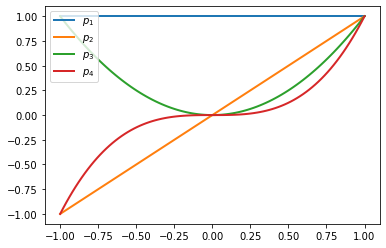

In [3]:
monomials = ([[1.],[0.,1.],[0.,0.,1.],[0.,0.,0.,1.]])
polyplot(monomials)

Dementsprechend ist $p_{k+1}(x) = x^k$.

---

In [4]:
def l2prod(coeff_p, coeff_q):
    p = (PowSer(coeff_p) * PowSer(coeff_q)).integ()
    return p(1) - p(-1)


---

### Aufgabe 2: Gram-Schmidt

Schreiben Sie den aus der Vorlesung bekannten Gram-Schmidt Algorithmus als Funktion `gram_schmidt(Coeffs)`. Dabei sei `Coeffs` eine Matrix, sodass jede Spalte ein Polynom in Potenzreihenform bestimmt: bestehe `Coeffs` aus den Elementen $\alpha_{ij}$, so sind durch
$$ p_j(x) = \sum_{i=0}^{m-1} \alpha_{ij} x^i, \qquad j = 0,\ldots,n-1, $$
$n$ Polynome mit maximalem Grad $(m-1)$ bestimmt. Für den Algorithmus verwenden Sie `l2prod()` aus Aufgabe 1.

- **Überprüfen** Sie den maximalen Orthogonalisierungs-Fehler nach Anwenden des Gram-Schmidt Algorithmus auf die Monombasis $x^0,\ldots,x^{n-1}$ für $n=5,10$ und $20$.

- **Lohnt sich** eine Re-Orthogonalisierung? Falls ja, wie oft?

- *Bonus:* Überprüfen Sie auch das Verhalten für den modifizierten Gram-Schmidt Algorithmus aus der Vorlesung. Vergleichen Sie Ihre (re-)orthogonalisierten Basen mit der entsprechenden Legendre-Polynombasis bis zum Grad $(n-1)$.

---


In [5]:
def gram_schmidt(Coeffs):
    n, m = Coeffs.shape
    for j in range(n):
        delta = np.zeros(m)
        for i in range(j-1):
            r = l2prod(Coeffs[:, j], Coeffs[:, i])
            delta += r*Coeffs[:, i]
        Coeffs[:, j] -= delta
        norm = np.sqrt(l2prod(Coeffs[:, j], Coeffs[:, j]))
        Coeffs[:, j] /= norm

def modified_gram_schmidt(Coeffs):
    n, m = Coeffs.shape
    for j in range(m):
        for i in range(j-1):
            r = l2prod(Coeffs[:, j], Coeffs[:, i])
            Coeffs[:, j] -= r*Coeffs[:, i]
        norm = np.sqrt(l2prod(Coeffs[:, j], Coeffs[:, j]))
        Coeffs[:, j] /= norm

In [6]:
for n in [5,10,20]:
    v = np.identity(n)
    gram_schmidt(v)
    g = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            g[i, j] = l2prod(v[:,i], v[:,j]) if i != j else 0
    print(f"  gs: n = {n:2d}, maxg = {abs(max(np.min(g), np.max(g), key=abs)):.3e}")

print()

for n in [5,10,20]:
    v = np.identity(n)
    gram_schmidt(v)
    gram_schmidt(v)
    g = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            g[i, j] = l2prod(v[:,i], v[:,j]) if i != j else 0
    print(f" dgs: n = {n:2d}, maxg = {abs(max(np.min(g), np.max(g), key=abs)):.3e}")

print()

for n in [5,10,20]:
    v = np.identity(n)
    gram_schmidt(v)
    gram_schmidt(v)
    gram_schmidt(v)
    g = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            g[i, j] = l2prod(v[:,i], v[:,j]) if i != j else 0
    print(f" tgs: n = {n:2d}, maxg = {abs(max(np.min(g), np.max(g), key=abs)):.3e}")

print()

for n in [5,10,20]:
    v = np.identity(n)
    modified_gram_schmidt(v)
    g = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            g[i, j] = l2prod(v[:,i], v[:,j]) if i != j else 0
    print(f" mgs: n = {n:2d}, maxg = {abs(max(np.min(g), np.max(g), key=abs)):.3e}")

print()

for n in [5,10,20]:
    v = np.identity(n)
    modified_gram_schmidt(v)
    modified_gram_schmidt(v)
    g = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            g[i, j] = l2prod(v[:,i], v[:,j]) if i != j else 0
    print(f"dmgs: n = {n:2d}, maxg = {abs(max(np.min(g), np.max(g), key=abs)):.3e}")

  gs: n =  5, maxg = 1.110e-15
  gs: n = 10, maxg = 2.611e-12
  gs: n = 20, maxg = 1.017e-01

 dgs: n =  5, maxg = 1.998e-15
 dgs: n = 10, maxg = 6.064e-12
 dgs: n = 20, maxg = 1.282e-04

 tgs: n =  5, maxg = 2.220e-16
 tgs: n = 10, maxg = 2.132e-13
 tgs: n = 20, maxg = 4.732e-05

 mgs: n =  5, maxg = 4.441e-16
 mgs: n = 10, maxg = 2.345e-12
 mgs: n = 20, maxg = 1.909e-04

dmgs: n =  5, maxg = 8.882e-16
dmgs: n = 10, maxg = 2.345e-12
dmgs: n = 20, maxg = 1.295e-05


Damit lohnt sich eine Re-Orthogonalisierung erst bei hohem n ($n \approx 20$). Dabei macht eine weitere Re-Orthogonalisierung den höchsten Unterschied, somit reichen insgesamt 2 Re-Orthogonalisierungen aus.